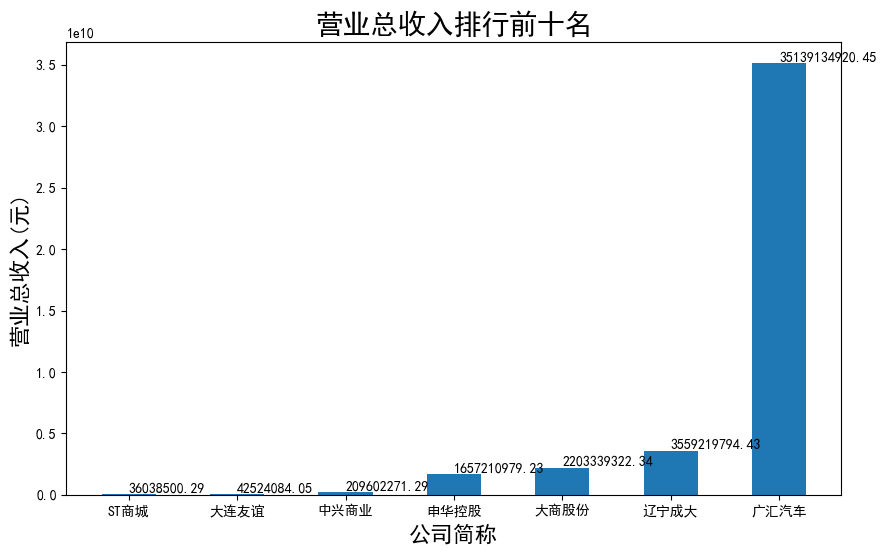

In [2]:
# 导入库
import pandas as pd
import matplotlib.pyplot as plt
import akshare as ak

# 获取全部数据
df1 = ak.stock_lrb_em(date="20220331")

# 读取行业信息
df=pd.read_excel('辽宁上市公司列表2022-05-21.xlsx')
df=df[(df['证监会行业代码']=='F>F51')|(df['证监会行业代码']=='F>F52')]
# 获取证券代码
df=df['证券代码']
l=[]
for x in df:
    x=str(x)
    l.append('0'*(6-len(x))+x if len(x)<6 else x)


# 获取对应行业股票数据
df1=df1[df1['股票代码'].isin(l)]

# 重复数据处理
df1 = df1.drop_duplicates()
# 空值处理
df1 = df1.dropna(axis=0, how='all')

# 获取前十排行数据
df1=df1.sort_values('营业总收入')
df1=df1[-10:]

#设置X轴,Y轴数据
x=df1['股票简称']
y=df1['营业总收入']

# 解决汉字显示乱码
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False

# 设置画布大小
plt.subplots(1, 1, figsize=(10, 6), dpi=100)
plt.bar(x,y,width=0.5)

# 添加标签
plt.xlabel('公司简称', fontsize='16')
plt.ylabel('营业总收入(元)', fontsize='16')
plt.title('营业总收入排行前十名',fontsize='20')  

# 对每个数据点加标注
for x_, y_ in zip(x, y):
    plt.text(x_, y_, y_, ha='left', va='bottom')

